In [ ]:
import pandas as pd
import matplotlib
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import os
import wrangle
import datetime as dt
import viz
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from prophet import Prophet

In [ ]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'validate_rmse'])

In [ ]:
# evaluation function to compute rmse
def evaluate(target_var):
    #yhat_df where index is the same as validate
    temp = yhat_df[validate.index[0].date():validate.index[-1].date()]
    rmse = round(sqrt(mean_squared_error(validate[target_var], 
    temp[target_var])), 0)
    return rmse

# plot and evaluate 
def plot_and_eval(target_var):
    '''plot vars and evaluate'''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'validate_rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [ ]:
df2,_,_,_,_ = wrangle.make_df2()

In [ ]:
df2.head()

,all_cause_deaths,covid_deaths,scaled_covid,scaled_all_cause,difference,average_death_age,average_covid_death_age,heart_related_deaths,scaled_heart_deaths,homicide_deaths,...,female_heart_related_deaths,female_scaled_heart_deaths,female_homicide_deaths,female_scaled_homicide_deaths,female_suicide_deaths,female_scaled_suicide_deaths,female_diabetes_deaths,female_scaled_diabetes_deaths,female_accident_deaths,female_scaled_accident_deaths
month,,,,,,,,,,,,,,,,,,,,,
2018-01-01,239715,0.0,0.0,73.896250,0.0,74.278996,0.0,67000,99.603074,1655.0,...,31075,100.000000,359.0,81.963470,820.0,78.619367,3810,85.139665,5536.0,85.221675
2018-02-01,198418,0.0,0.0,61.165743,0.0,73.845353,0.0,54644,81.234483,1344.0,...,25347,81.567176,277.0,63.242009,767.0,73.537872,3030,67.709497,4755.0,73.198892
2018-03-01,208399,0.0,0.0,64.242557,0.0,73.560809,0.0,58267,86.620483,1437.0,...,27030,86.983105,336.0,76.712329,879.0,84.276127,3253,72.692737,4978.0,76.631773
2018-04-01,195383,0.0,0.0,60.230152,0.0,73.407706,0.0,54213,80.593753,1547.0,...,25001,80.453741,334.0,76.255708,836.0,80.153404,3097,69.206704,4768.0,73.399015
2018-05-01,192393,0.0,0.0,59.308434,0.0,72.862241,0.0,53274,79.197824,1528.0,...,24201,77.879324,317.0,72.374429,919.0,88.111218,3044,68.022346,4828.0,74.322660


Split the data into train, validate, and test sets

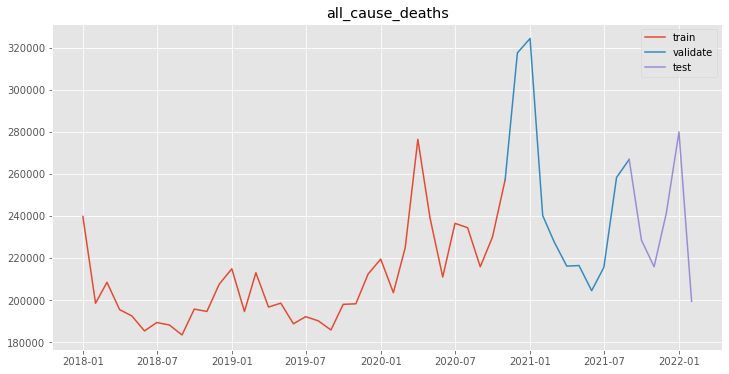

In [ ]:
#split df into train validate and test
train = df2[:int(len(df2)*0.7)]
validate = df2[int(len(df2)*0.7)-1:int(len(df2)*0.9)]
test = df2[int(len(df2)*0.9)-1:]
plt.figure(figsize=(12,6))
plt.plot(train['all_cause_deaths'])
plt.plot(validate['all_cause_deaths'])
plt.plot(test['all_cause_deaths'])
plt.legend(['train','validate','test'])
plt.title('all_cause_deaths')
plt.show()


In [ ]:
all_cause_deaths = df2['all_cause_deaths'].mean()
covid_deaths = df2['covid_deaths'].mean()

yhat_df = pd.DataFrame({'all_cause_deaths' : [all_cause_deaths], 
                            'covid_deaths': [covid_deaths]}
                            , index = validate.index)

yhat_df.head()


,all_cause_deaths,covid_deaths
month,,
2020-11-01,219193.86,17475.52
2020-12-01,219193.86,17475.52
2021-01-01,219193.86,17475.52
2021-02-01,219193.86,17475.52
2021-03-01,219193.86,17475.52


all_cause_deaths -- RMSE: 49303


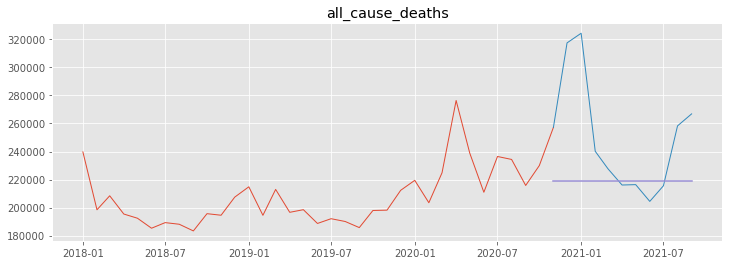

covid_deaths -- RMSE: 37667


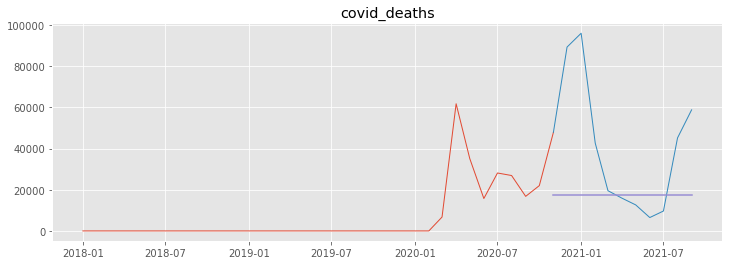

In [ ]:
for col in yhat_df.columns:
    plot_and_eval(col)

In [ ]:

for col in yhat_df.columns:
    eval_df = append_eval_df('simple_average', col)
eval_df

,model_type,target_var,validate_rmse
0,simple_average,all_cause_deaths,49303.0
1,simple_average,covid_deaths,37667.0


# PROPHET

In [ ]:
target_var = 'all_cause_deaths'
train['y'] = train[target_var]
train['ds'] = train.index
train = train[['ds', 'y']]

validate['y'] = validate[target_var]
validate['ds'] = validate.index
validate = validate[['ds', 'y']]

test['y'] = test[target_var]
test['ds'] = test.index
test = test[['ds', 'y']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -46.7713
Iteration  1. Log joint probability =    15.0605. Improved by 61.8318.
Iteration  2. Log joint probability =    53.8821. Improved by 38.8217.
Iteration  3. Log joint probability =    70.9458. Improved by 17.0637.
Iteration  4. Log joint probability =     93.488. Improved by 22.5422.
Iteration  5. Log joint probability =    94.1708. Improved by 0.682761.
Iteration  6. Log joint probability =    94.2061. Improved by 0.0352785.
Iteration  7. Log joint probability =    94.2171. Improved by 0.0109824.
Iteration  8. Log joint probability =    94.2176. Improved by 0.000576574.
Iteration  9. Log joint probability =    94.3198. Improved by 0.102115.
Iteration 10. Log joint probability =    94.4822. Improved by 0.162454.
Iteration 11. Log joint probability =    94.5119. Improved by 0.0296769.
Iteration 12. Log joint probability =    103.717. Improved by 9.20545.
Iteration 13. Log joint probability =    103.733. Improved by 0.0161476.
Iteration 14. Log jo

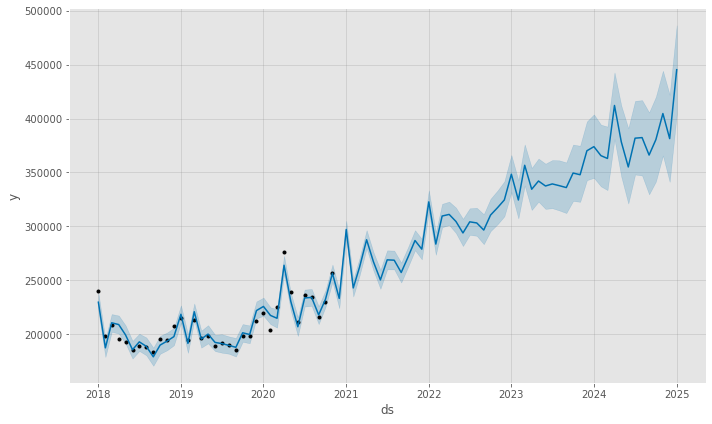

In [ ]:
# Prophet
model = Prophet().fit(train)
future = model.make_future_dataframe(periods=50, freq='MS')
yhat = model.predict(future)
yhat.index = yhat['ds']
fig=model.plot(yhat)



In [ ]:
yhat_df[validate.index[1]:validate.index[-1]]


,all_cause_deaths,covid_deaths
month,,
2020-12-01,219193.86,17475.52
2021-01-01,219193.86,17475.52
2021-02-01,219193.86,17475.52
2021-03-01,219193.86,17475.52
2021-04-01,219193.86,17475.52
2021-05-01,219193.86,17475.52
2021-06-01,219193.86,17475.52
2021-07-01,219193.86,17475.52
2021-08-01,219193.86,17475.52


In [ ]:
yhat_df = round(yhat[['yhat','ds']].tail(365),2)
yhat_df.rename(columns = {'yhat': 'all_cause_deaths'}, inplace = True)
yhat_df.set_index('ds', inplace = True)
yhat_df= yhat_df[validate.index[0]:validate.index[-1]]
len(yhat_df)

11

In [72]:
def plot_and_eval_prophet(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train['y'])
    plt.plot(validate['y'])
    plt.plot(yhat_df[target_var], linestyle='--')
    plt.title(target_var)
    temp = yhat_df[validate.index[0].date():validate.index[-1].date()]
    rmse = round(sqrt(mean_squared_error(validate["y"], temp[target_var])), 0)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.legend(['train','validate','prophet'])
    plt.show()

all_cause_deaths -- RMSE: 44658


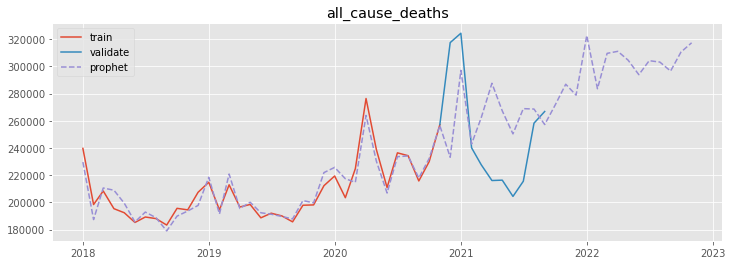

In [73]:
plot_and_eval_prophet('all_cause_deaths')

In [ ]:
def run_prophet(target_var, period,seasonality_mode='additive'):
    df = wrangle.get_df_only()
    #df.rename(columns = {target_var: 'y'}, inplace = True)
    df['y'] = df[target_var]
    df['ds'] = df.index.date
    train = df[:int(len(df2)*0.7)]
    validate = df[int(len(df2)*0.7)-1:int(len(df)*0.9)]
    #test = df2[int(len(df2)*0.9)-1:]
    model = Prophet(seasonality_mode=seasonality_mode)
    model.fit(train)
    future = model.make_future_dataframe(periods = period, freq = 'MS')
    yhat = model.predict(future)
    yhat_df = round(yhat[['yhat','ds']],2)
    yhat_df.rename(columns = {'yhat': target_var}, inplace = True)
    yhat_df.set_index('ds', inplace = True)
    return train, validate, yhat_df
    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -46.7713
Iteration  1. Log joint probability =    15.0605. Improved by 61.8318.
Iteration  2. Log joint probability =    53.8821. Improved by 38.8217.
Iteration  3. Log joint probability =    70.9458. Improved by 17.0637.
Iteration  4. Log joint probability =     93.488. Improved by 22.5422.
Iteration  5. Log joint probability =    94.1708. Improved by 0.682761.
Iteration  6. Log joint probability =    94.2061. Improved by 0.0352785.
Iteration  7. Log joint probability =    94.2171. Improved by 0.0109824.
Iteration  8. Log joint probability =    94.2176. Improved by 0.000576574.
Iteration  9. Log joint probability =    94.3198. Improved by 0.102115.
Iteration 10. Log joint probability =    94.4822. Improved by 0.162454.
Iteration 11. Log joint probability =    94.5119. Improved by 0.0296769.
Iteration 12. Log joint probability =    103.717. Improved by 9.20545.
Iteration 13. Log joint probability =    103.733. Improved by 0.0161476.
Iteration 14. Log jo

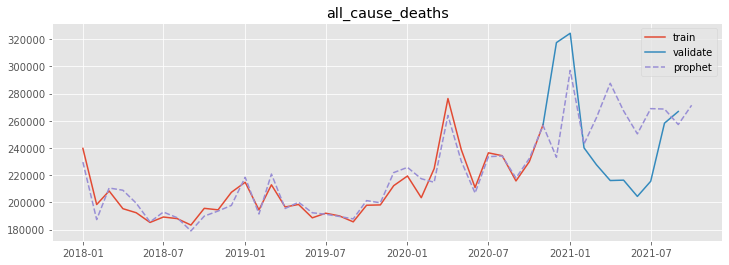

,model_type,target_var,validate_rmse
0,simple_average,all_cause_deaths,49303.0
1,simple_average,covid_deaths,37667.0
2,prophet,all_cause_deaths,44658.0
3,prophet,covid_deaths,40725.0
4,prophet_multi,all_cause_deaths,47704.0
5,prophet,all_cause_deaths,44658.0


In [74]:
train, validate, yhat_df = run_prophet('all_cause_deaths', 11)
plot_and_eval_prophet('all_cause_deaths')
eval_df = append_eval_df('prophet', 'all_cause_deaths')
eval_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -48.2751
Iteration  1. Log joint probability =    22.2684. Improved by 70.5435.
Iteration  2. Log joint probability =    42.7353. Improved by 20.4668.
Iteration  3. Log joint probability =    55.2881. Improved by 12.5528.
Iteration  4. Log joint probability =    55.9812. Improved by 0.693177.
Iteration  5. Log joint probability =    56.0288. Improved by 0.0475397.
Iteration  6. Log joint probability =    56.0771. Improved by 0.0482997.
Iteration  7. Log joint probability =    56.1222. Improved by 0.045142.
Iteration  8. Log joint probability =    56.1356. Improved by 0.0134251.
Iteration  9. Log joint probability =    56.1654. Improved by 0.0297656.
Iteration 10. Log joint probability =    56.1747. Improved by 0.00927257.
Iteration 11. Log joint probability =      56.18. Improved by 0.00535636.
Iteration 12. Log joint probability =    56.1801. Improved by 2.58578e-05.
Iteration 13. Log joint probability =    56.1819. Improved by 0.00183175.
Iteration 14

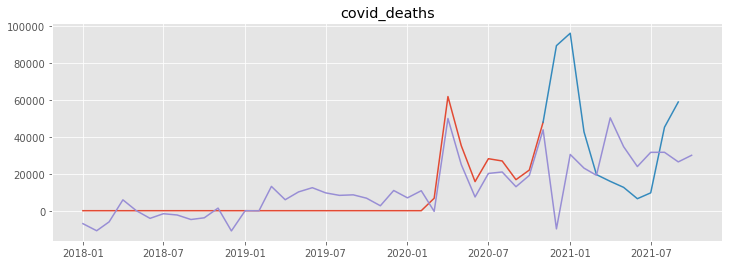

,model_type,target_var,validate_rmse
0,simple_average,all_cause_deaths,49303.0
1,simple_average,covid_deaths,37667.0
2,prophet,all_cause_deaths,44658.0
3,prophet,covid_deaths,40725.0


In [ ]:
train, validate, yhat_df = run_prophet('covid_deaths', 11)
plot_and_eval_prophet('covid_deaths')
eval_df=append_eval_df('prophet', 'covid_deaths')
eval_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -46.7713
Iteration  1. Log joint probability =      6.532. Improved by 53.3033.
Iteration  2. Log joint probability =    30.0726. Improved by 23.5406.
Iteration  3. Log joint probability =    56.6528. Improved by 26.5801.
Iteration  4. Log joint probability =    64.3403. Improved by 7.68757.
Iteration  5. Log joint probability =    76.0883. Improved by 11.748.
Iteration  6. Log joint probability =    90.2386. Improved by 14.1503.
Iteration  7. Log joint probability =    96.5737. Improved by 6.33503.
Iteration  8. Log joint probability =    99.5828. Improved by 3.00909.
Iteration  9. Log joint probability =    99.6834. Improved by 0.100611.
Iteration 10. Log joint probability =    99.7141. Improved by 0.0306825.
Iteration 11. Log joint probability =    99.8218. Improved by 0.107745.
Iteration 12. Log joint probability =    100.269. Improved by 0.447101.
Iteration 13. Log joint probability =    100.479. Improved by 0.210579.
Iteration 14. Log joint probab

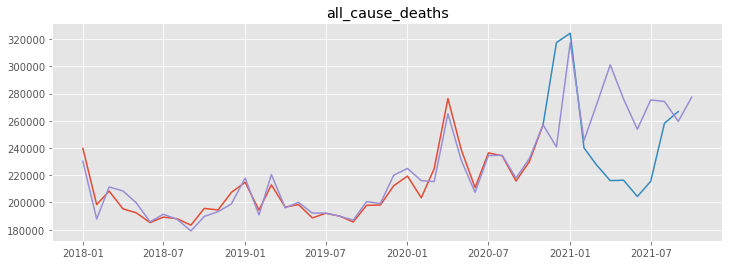

,model_type,target_var,validate_rmse
0,simple_average,all_cause_deaths,49303.0
1,simple_average,covid_deaths,37667.0
2,prophet,all_cause_deaths,44658.0
3,prophet,covid_deaths,40725.0
4,prophet_multi,all_cause_deaths,47704.0


In [ ]:
train, validate, yhat_df = run_prophet('all_cause_deaths', 11, "multiplicative")
plot_and_eval_prophet('all_cause_deaths')
eval_df = append_eval_df('prophet_multi', 'all_cause_deaths')
eval_df

In [ ]:
# takes to long to run probably due to the number of zeros for covid deaths

# train, validate, yhat_df = run_prophet('covid_deaths', 11, "multiplicative")
# plot_and_eval_prophet('covid_deaths')
# eval_df = append_eval_df('prophet_multi', 'covid_deaths')
# eval_df


In [47]:
def run_prophet_w_test(target_var, period,seasonality_mode='additive'):
    df = wrangle.get_df_only()
    #df.rename(columns = {target_var: 'y'}, inplace = True)
    df['y'] = df[target_var]
    df['ds'] = df.index.date
    train = df[:int(len(df2)*0.7)]
    validate = df[int(len(df2)*0.7)-1:int(len(df)*0.9)]
    test = df[int(len(df2)*0.9)-1:]
    model = Prophet(seasonality_mode=seasonality_mode)
    model.fit(train)
    future = model.make_future_dataframe(periods = period, freq = 'MS')
    yhat = model.predict(future)
    yhat_df = round(yhat[['yhat','ds']],2)
    yhat_df.rename(columns = {'yhat': target_var}, inplace = True)
    yhat_df.set_index('ds', inplace = True)
    return train, validate, test, yhat_df

In [68]:
def plot_and_eval_prophet_w_test(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train['y'])
    plt.plot(validate['y'])
    plt.plot(test['y'])
    plt.plot(yhat_df[target_var], linestyle='--')
    plt.title(target_var)
    temp = yhat_df[validate.index[0].date():validate.index[-1].date()]
    temp2 = yhat_df[test.index[0].date():test.index[-1].date()]
    rmse = round(sqrt(mean_squared_error(validate["y"], temp[target_var])), 0)
    test_rmse = round(sqrt(mean_squared_error(test["y"], temp2[target_var])), 0)
    print(target_var, '-- Validate RMSE: {:.0f}'.format(rmse))
    print(target_var, '-- Test RMSE: {:.0f}'.format(test_rmse))
    plt.legend(['train', 'validate', 'test', 'prediction'])
    plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -46.7713
Iteration  1. Log joint probability =    15.0605. Improved by 61.8318.
Iteration  2. Log joint probability =    53.8821. Improved by 38.8217.
Iteration  3. Log joint probability =    70.9458. Improved by 17.0637.
Iteration  4. Log joint probability =     93.488. Improved by 22.5422.
Iteration  5. Log joint probability =    94.1708. Improved by 0.682761.
Iteration  6. Log joint probability =    94.2061. Improved by 0.0352785.
Iteration  7. Log joint probability =    94.2171. Improved by 0.0109824.
Iteration  8. Log joint probability =    94.2176. Improved by 0.000576574.
Iteration  9. Log joint probability =    94.3198. Improved by 0.102115.
Iteration 10. Log joint probability =    94.4822. Improved by 0.162454.
Iteration 11. Log joint probability =    94.5119. Improved by 0.0296769.
Iteration 12. Log joint probability =    103.717. Improved by 9.20545.
Iteration 13. Log joint probability =    103.733. Improved by 0.0161476.
Iteration 14. Log jo

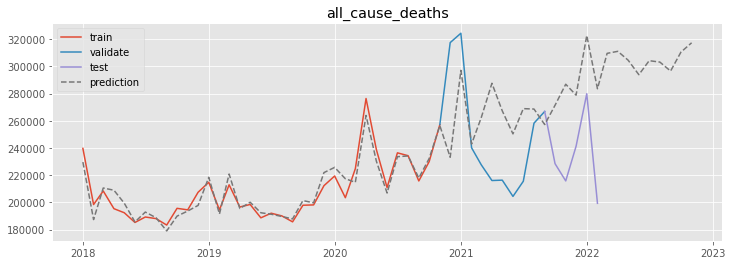

In [69]:
train, validate, test, yhat_df = run_prophet_w_test('all_cause_deaths', 24)
plot_and_eval_prophet_w_test('all_cause_deaths')

In [57]:
def run_prophet_future(target_var, period,seasonality_mode='additive'):
    df = wrangle.get_df_only()
    #df.rename(columns = {target_var: 'y'}, inplace = True)
    df['y'] = df[target_var]
    df['ds'] = df.index.date
    model = Prophet(seasonality_mode=seasonality_mode)
    model.fit(df)
    future = model.make_future_dataframe(periods = period, freq = 'MS')
    yhat = model.predict(future)
    yhat_df = round(yhat[['yhat','ds']],2)
    yhat_df.rename(columns = {'yhat': target_var}, inplace = True)
    yhat_df.set_index('ds', inplace = True)
    fig=model.plot(yhat)
    return yhat_df

In [75]:
def plot_future_prophet(target_var):
    plt.figure(figsize=(12,4))
    df = wrangle.get_df_only()
    #df.rename(columns = {target_var: 'y'}, inplace = True)
    df['y'] = df[target_var]
    df['ds'] = df.index.date
    plt.plot(df['y'])
    plt.plot(yhat_df[target_var], linestyle='--')
    plt.title(target_var)
    plt.legend(['data', 'prediction'])
    plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -60.4755
Iteration  1. Log joint probability =    12.4908. Improved by 72.9663.
Iteration  2. Log joint probability =    76.7799. Improved by 64.2891.
Iteration  3. Log joint probability =    76.8062. Improved by 0.0262941.
Iteration  4. Log joint probability =    76.8542. Improved by 0.0480355.
Iteration  5. Log joint probability =    76.8963. Improved by 0.0420447.
Iteration  6. Log joint probability =    76.9507. Improved by 0.0544264.
Iteration  7. Log joint probability =    76.9836. Improved by 0.0328616.
Iteration  8. Log joint probability =    76.9972. Improved by 0.01366.
Iteration  9. Log joint probability =    77.1385. Improved by 0.141266.
Iteration 10. Log joint probability =    77.1663. Improved by 0.027768.
Iteration 11. Log joint probability =    77.2519. Improved by 0.085628.
Iteration 12. Log joint probability =    83.2761. Improved by 6.02421.
Iteration 13. Log joint probability =    83.3164. Improved by 0.0402645.
Iteration 14. Log jo

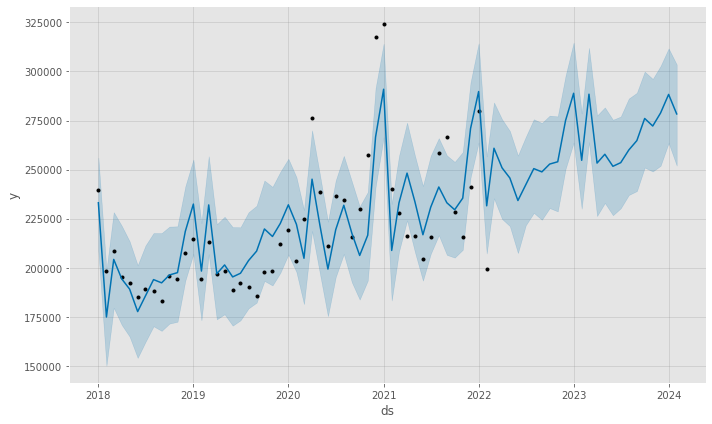

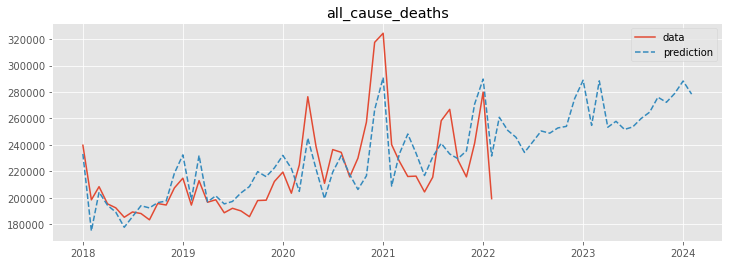

In [76]:
# lets use all data to predict the future
yhat_df = run_prophet_future('all_cause_deaths', 24)
plot_future_prophet('all_cause_deaths')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -61.0982
Iteration  1. Log joint probability =    38.4705. Improved by 99.5687.
Iteration  2. Log joint probability =    54.7396. Improved by 16.2691.
Iteration  3. Log joint probability =    59.7874. Improved by 5.04784.
Iteration  4. Log joint probability =    66.7531. Improved by 6.96574.
Iteration  5. Log joint probability =    67.1671. Improved by 0.414011.
Iteration  6. Log joint probability =    67.4006. Improved by 0.233462.
Iteration  7. Log joint probability =    67.4237. Improved by 0.0230967.
Iteration  8. Log joint probability =    67.4527. Improved by 0.0289526.
Iteration  9. Log joint probability =    67.5193. Improved by 0.0666586.
Iteration 10. Log joint probability =    67.6671. Improved by 0.147816.
Iteration 11. Log joint probability =    67.6838. Improved by 0.0166589.
Iteration 12. Log joint probability =    67.7387. Improved by 0.0549015.
Iteration 13. Log joint probability =    67.7981. Improved by 0.0594267.
Iteration 14. Log jo

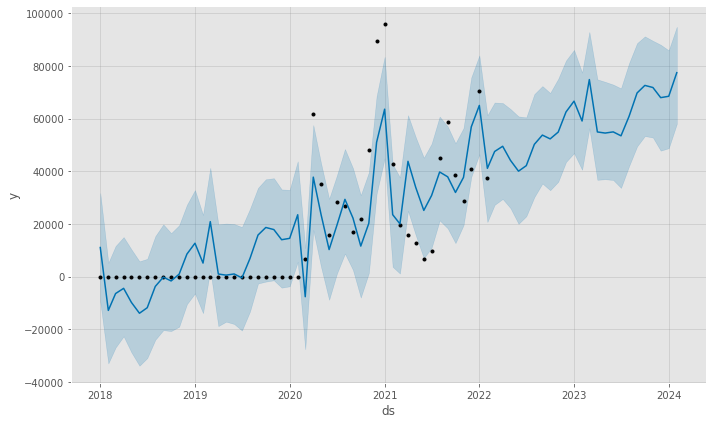

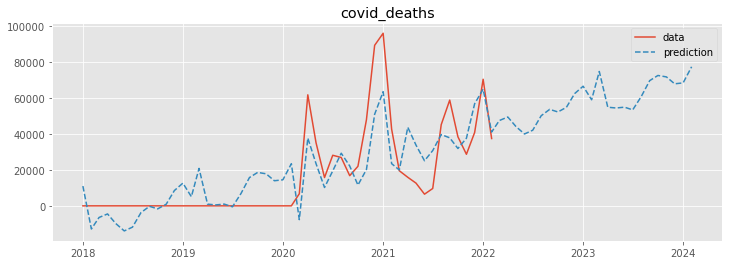

In [77]:
yhat_df = run_prophet_future('covid_deaths', 24)
plot_future_prophet('covid_deaths')